# http://karpov.courses

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Описание данных 
**user_data:**
* client – идентификатор пользователя
* premium – является ли клиент премиум
* age – возраст

**logs:**
* client – идентификатор пользователя
* success – результат (успех - 1, нет - 0)
* platform – платформа
* time – время в формате Unix

### Задание 1
Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, посмотрите на описательную статистику. 

Вопрос: Сколько уникальных значений принимает переменная platform?

In [8]:
users_df = pd.read_csv(filepath_or_buffer='user_data.csv')
print(users_df.head())
print('')
print(users_df.info())
print('')
print(users_df.describe())

   client  premium  age
0   46346    False   58
1    4391    False   55
2   27372    False   64
3   11989    False   44
4   60664    False   49

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   client   2954 non-null   int64
 1   premium  2954 non-null   bool 
 2   age      2954 non-null   int64
dtypes: bool(1), int64(2)
memory usage: 49.2 KB
None

             client          age
count   2954.000000  2954.000000
mean   50767.886594    44.196005
std    28800.505847    14.248336
min       40.000000    20.000000
25%    25639.500000    32.000000
50%    51569.500000    44.000000
75%    75963.250000    56.000000
max    99973.000000    69.000000


In [9]:
logs_df = pd.read_csv(filepath_or_buffer='logs.csv')
print(logs_df.head())
print('')
print(logs_df.info())
print('')
print(logs_df.describe())

   client  success  platform        time
0   40177     True     phone  1585412212
1   61468     True     phone  1585425658
2   35604    False     phone  1585459894
3    9961     True     phone  1585400189
4   10931     True  computer  1585468629

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   client    4500 non-null   int64 
 1   success   4500 non-null   bool  
 2   platform  4500 non-null   object
 3   time      4500 non-null   int64 
dtypes: bool(1), int64(2), object(1)
memory usage: 110.0+ KB
None

             client          time
count   4500.000000  4.500000e+03
mean   50998.758000  1.585440e+09
std    28374.472495  2.314866e+04
min       40.000000  1.585400e+09
25%    27056.500000  1.585420e+09
50%    52659.000000  1.585440e+09
75%    76001.250000  1.585461e+09
max    99993.000000  1.585480e+09


In [14]:
print(f"Number of unique values in logs_df['platform']: {logs_df['platform'].nunique()}, " \
      + f"unique values themself: {logs_df['platform'].unique()}")

Number of unique values in logs_df['platform']: 3, unique values: ['phone' 'computer' 'tablet']


### Задание 2
Какой клиент совершил больше всего успешных операций?

Если несколько пользователей совершили одинаковое число успешных действий, перечислите их идентификаторы (client) через запятую и пробел в порядке возрастания.

In [39]:
client_success = logs_df.groupby(by='client', as_index=False) \
    .agg({'success': 'sum'}) \
    .sort_values(by=['success', 'client'],ascending=[False, True])
client_success.head()

,client,success
468,12179,41
1120,28719,41
1426,36165,41
2095,52870,41
2468,61468,41


In [49]:
client_success = client_success[client_success['success'] == 41]
# Криво, потому что apply хочет вернуть результат выполнения
client_success['client'].apply(lambda x: print(f"{x},"),)  

12179,
28719,
36165,
52870,
61468,
61473,
78349,
82563,
92584,


468     None
1120    None
1426    None
2095    None
2468    None
2469    None
3141    None
3300    None
3712    None
Name: client, dtype: object

### Задание 3
С какой платформы осуществляется наибольшее количество успешных операций?

In [51]:
logs_df.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [54]:
logs_df.groupby(by='platform').agg({'success': 'sum'}) \
    .sort_values(by=['success'])

,success
platform,
tablet,180
computer,1090
phone,2019


### Задание 4
Какая платформа наиболее популярна среди премиумных клиентов?

In [56]:
logs_df.head(3)

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894


In [55]:
users_df.head(3)

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64


In [61]:
merged_df = pd.merge(left=users_df, right=logs_df, how='inner', on='client',)
merged_df.head(3)

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018


In [60]:
merged_df.groupby(by=['platform']).agg({'premium': 'sum'})

,premium
platform,
computer,150
phone,246
tablet,24


### Задание 5
Визуализируйте распределение возраста клиентов в зависимости от типа клиента (обычный или премиум), используя библиотеку seaborn с параметрами цвета по умолчанию. Какой график получится в результате?

Используйте датасет, который вы получили на предыдущем шаге.

/Users/igor/miniconda3/envs/sandbox/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/igor/miniconda3/envs/sandbox/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/igor/miniconda3/envs/sandbox/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/igor/miniconda3/envs/sandbox/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

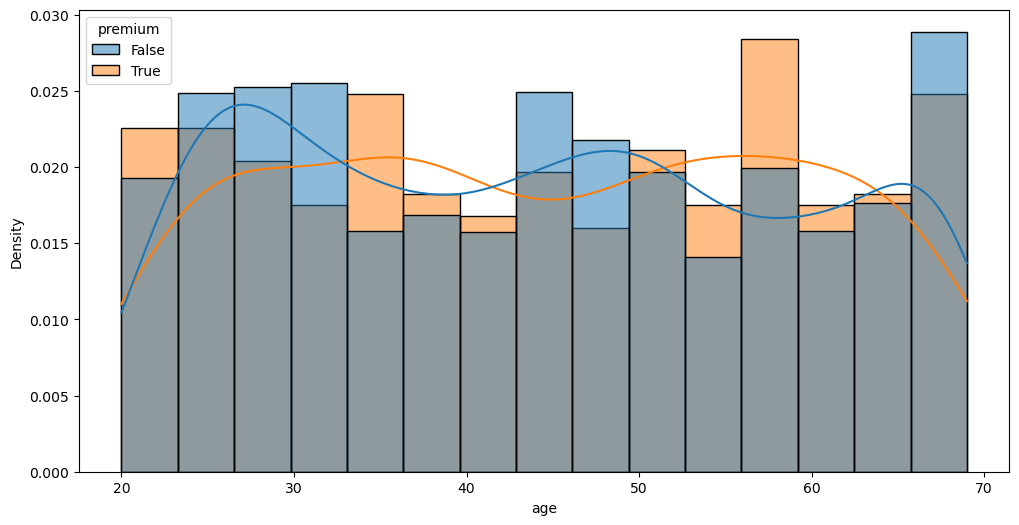

In [82]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(ax=ax, data=merged_df, x='age', hue='premium', kde=True,
             stat='density', alpha=0.5, common_norm=False,);

### Задание 6
Постройте график распределения числа успешных операций: 

x – число успешных операций

Сгруппируйте данные по клиентам и посчитайте число успешных операций. Далее постройте гистограмму распределения этой величины с помощью sns.distplot

In [83]:
merged_df.head()

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918


In [102]:
temp_df = merged_df.groupby(by='client').agg({'success': 'sum'})
temp_df.head()

,success
client,
40,1
75,1
81,1
132,1
164,1


/Users/igor/miniconda3/envs/sandbox/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/igor/miniconda3/envs/sandbox/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


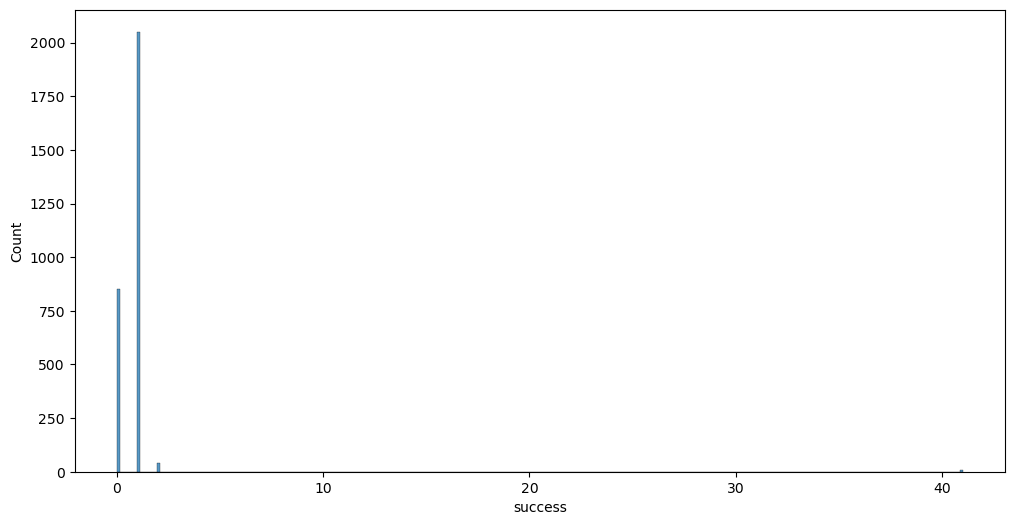

In [103]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(ax=ax, data=temp_df, x='success');

### Задание 7
⭐️Задание со звёздочкой!⭐️

Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. По оси x – возраст, y – число успешных операций. Если размер графика получается небольшим, можно добавить plt.figure(figsize=(12, 8)) в начало соответствующей ячейки. 

Вопрос: Клиенты какого возраста совершили наибольшее количество успешных действий?

In [105]:
merged_df.head(3)

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018


In [111]:
temp_df = merged_df.query('platform == "computer" and success == True ')
temp_df.head(10)

,client,premium,age,success,platform,time
3,11989,False,44,True,computer,1585403698
12,32406,False,24,True,computer,1585479382
14,62404,False,40,True,computer,1585430097
20,68848,False,35,True,computer,1585440553
26,49675,False,48,True,computer,1585402108
30,32603,True,20,True,computer,1585473383
33,37237,False,63,True,computer,1585405136
35,1626,False,39,True,computer,1585412098
42,8975,False,46,True,computer,1585453568
45,52085,False,49,True,computer,1585464942


/Users/igor/miniconda3/envs/sandbox/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/igor/miniconda3/envs/sandbox/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/igor/miniconda3/envs/sandbox/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


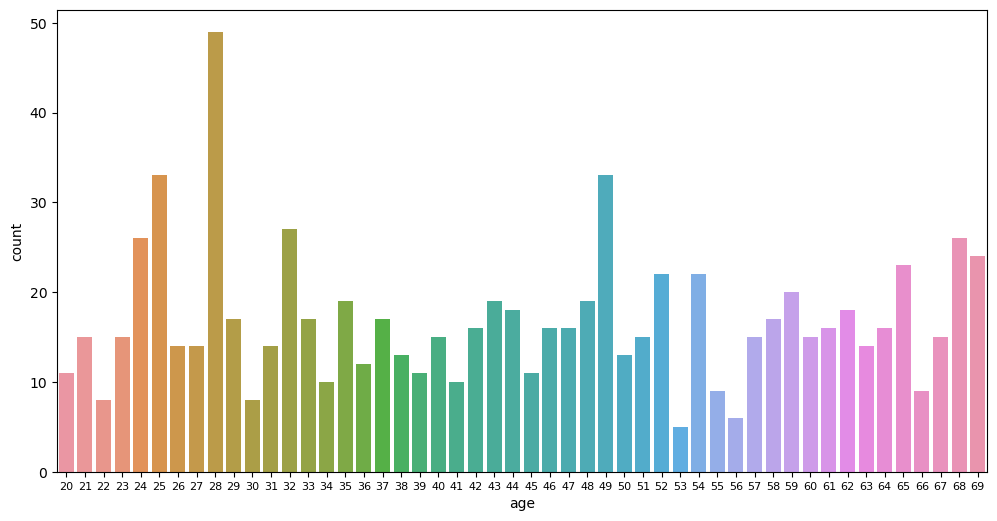

In [116]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(ax=ax, data=temp_df, x='age')
ax.tick_params(axis='x', labelsize=8);